# Problem - Statement:
Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.
Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import pickle
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option("display.max_columns",None)

In [4]:
rain = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')

In [5]:
rain.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


## Data Preprocessing

In [6]:
rain.shape

(8425, 23)

In [7]:
rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [8]:
# categorical data:

categorical_features = [column_name for column_name in rain.columns if rain[column_name].dtype == 'O']
print("Number of Categorical Features: {}".format(len(categorical_features)))
print("Categorical Features: ",categorical_features)

Number of Categorical Features: 7
Categorical Features:  ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [9]:
# Numerical Features:

numerical_features = [column_name for column_name in rain.columns if rain[column_name].dtype != 'O']

#rain.select_dtypes(include=['float64','int64']).columns 

print("Number of Numerical Features: {}".format(len(numerical_features)))
print("Numerical Features: ",numerical_features)

Number of Numerical Features: 16
Numerical Features:  ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [10]:
# finding cardinality of categorical features:

for each_feature in categorical_features:
    print("Cardinality(no. of unique values) of {} are: {}".format(each_feature,len(rain[each_feature].unique())))

Cardinality(no. of unique values) of Date are: 3004
Cardinality(no. of unique values) of Location are: 12
Cardinality(no. of unique values) of WindGustDir are: 17
Cardinality(no. of unique values) of WindDir9am are: 17
Cardinality(no. of unique values) of WindDir3pm are: 17
Cardinality(no. of unique values) of RainToday are: 3
Cardinality(no. of unique values) of RainTomorrow are: 3


Date column has high cardinality which poses several problems to ml model in terms of efficency and also dimenionality of data also increases when converted to numerical data.

Feature enginerring of Date column to decrease high cardinality.

In [11]:
# Type conversion of Date Column to datetime type:

rain['Date'] = pd.to_datetime(rain['Date'])

In [12]:
rain['Date'].dtype

dtype('<M8[ns]')

In [13]:
rain['year'] = rain['Date'].dt.year
rain['month'] = rain['Date'].dt.month
rain['day'] = rain['Date'].dt.day

In [14]:
rain.drop('Date', axis = 1, inplace = True)

In [15]:
rain.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


In [16]:
# categorical data: 

categorical_features = [column_name for column_name in rain.columns if rain[column_name].dtype == 'O']
print("Number of Categorical Features: {}".format(len(categorical_features)))
print("Categorical Features: ",categorical_features)

Number of Categorical Features: 6
Categorical Features:  ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [17]:
# Numerical Features:

numerical_features = [column_name for column_name in rain.columns if rain[column_name].dtype != 'O']
#rain.select_dtypes(include=['float64','int64']).columns 
print("Number of Numerical Features: {}".format(len(numerical_features)))
print("Numerical Features: ",numerical_features)

Number of Numerical Features: 19
Numerical Features:  ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'year', 'month', 'day']


Checking for Null values:

In [18]:
rain[categorical_features].isnull().sum()

Location          0
WindGustDir     991
WindDir9am      829
WindDir3pm      308
RainToday       240
RainTomorrow    239
dtype: int64

In [19]:
# list of categorical features which has null values:

categorical_features_with_null = [feature for feature in categorical_features if rain[feature].isnull().sum()]

Filling the missing(Null) categorical features with most frequent value(mode)

In [20]:
# Filling the missing(Null) categorical features with most frequent value(mode)

for each_feature in categorical_features_with_null:
    mode_val = rain[each_feature].mode()[0]
    rain[each_feature].fillna(mode_val,inplace=True)

In [21]:
rain[categorical_features].isnull().sum()

Location        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

 Handling Null values in numerical features:

In [22]:
# checking null values in numerical features

rain[numerical_features].isnull().sum()

MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustSpeed     991
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
year                0
month               0
day                 0
dtype: int64

<AxesSubplot:>

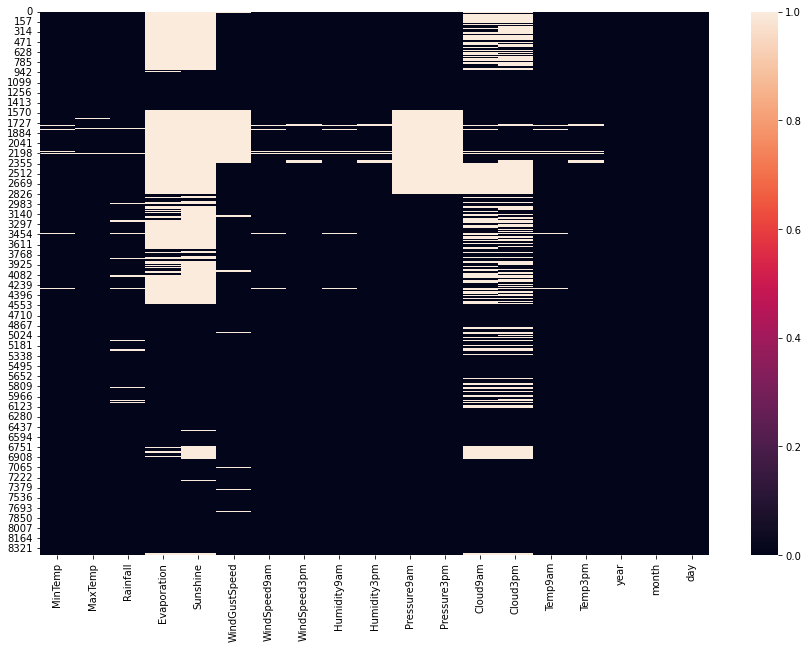

In [23]:
plt.figure(figsize=(15,10))
sns.heatmap(rain[numerical_features].isnull(),linecolor='white')

<AxesSubplot:>

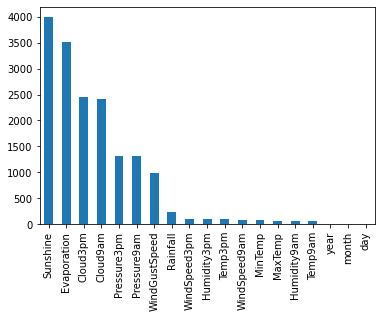

In [24]:
# visualizing the Null values in Numerical Features:

rain[numerical_features].isnull().sum().sort_values(ascending = False).plot(kind = 'bar')

Null values in Numerical Features can be imputed using Mean and Median. Mean is sensitive to outliers and median is immune to outliers. If you want to impute the null values with mean values, then outliers in numerical features need to be addressed properly.

checking for outliers in Numerical Features

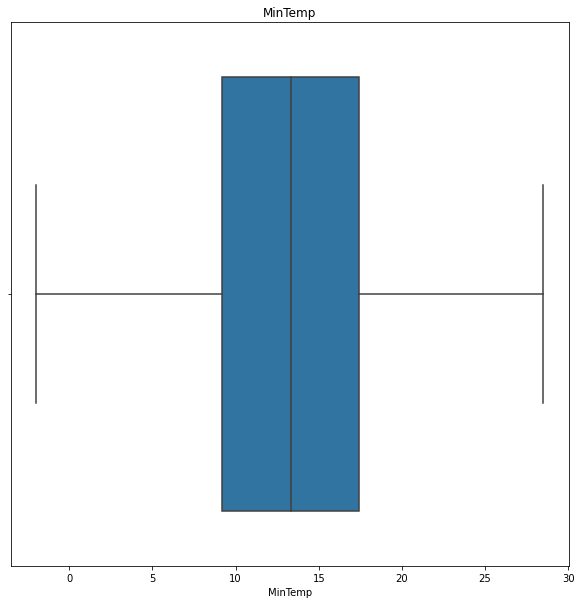

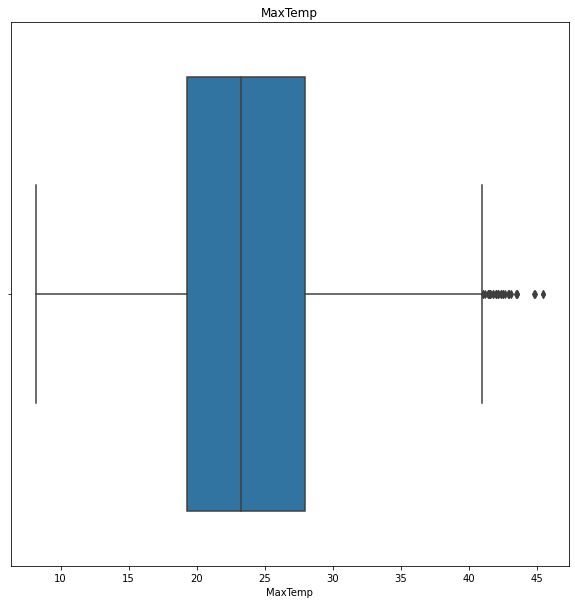

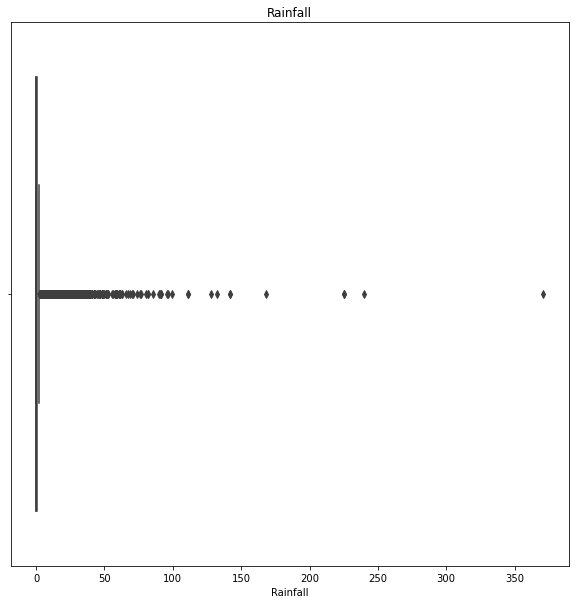

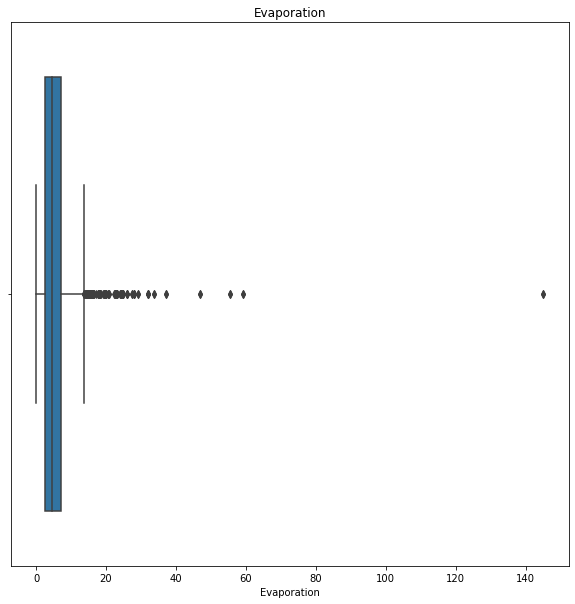

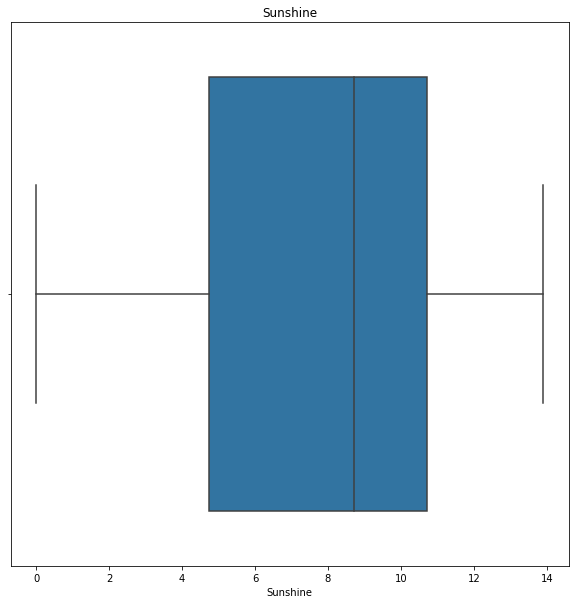

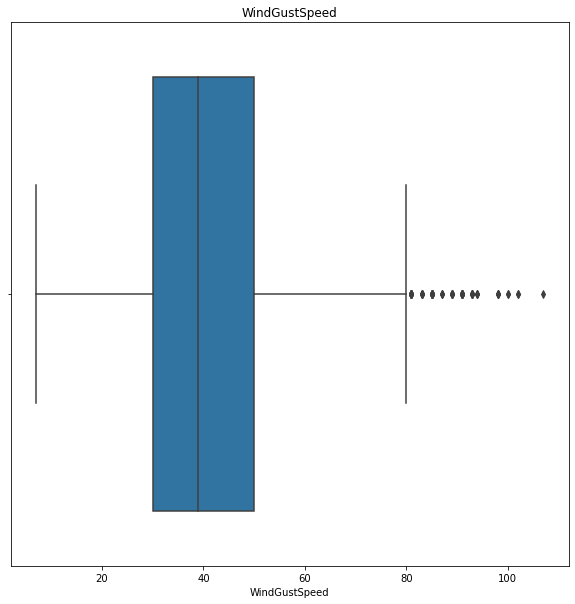

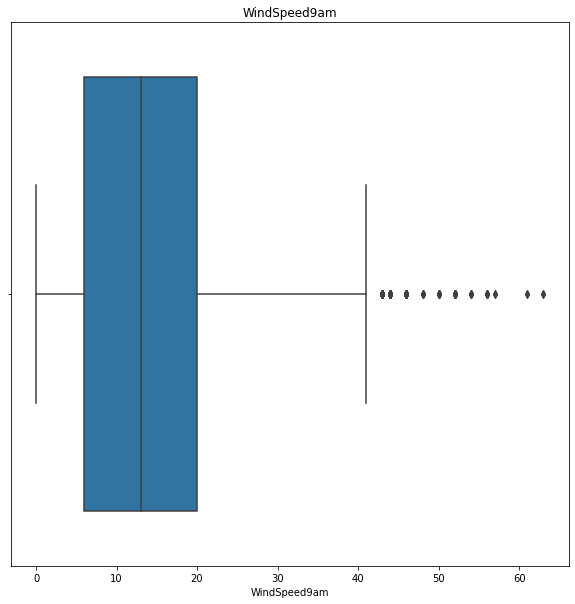

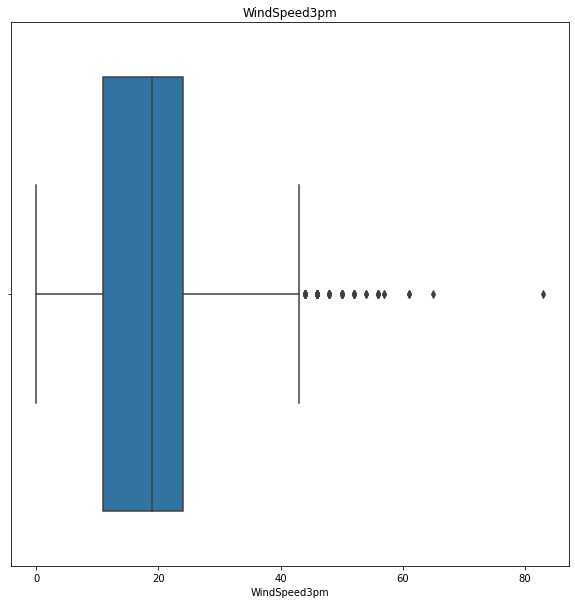

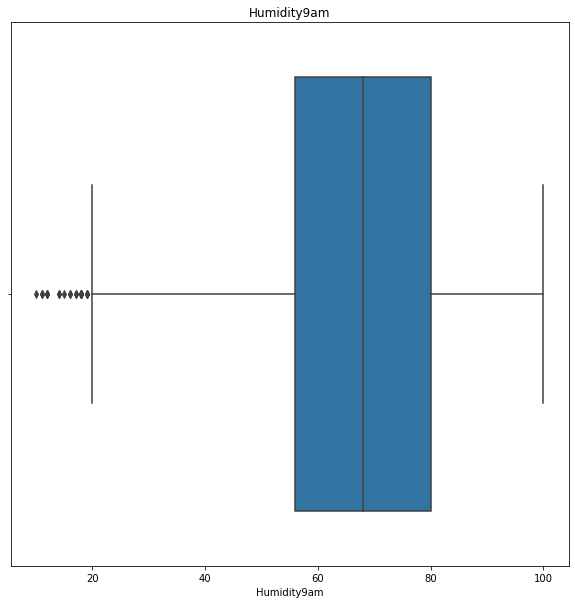

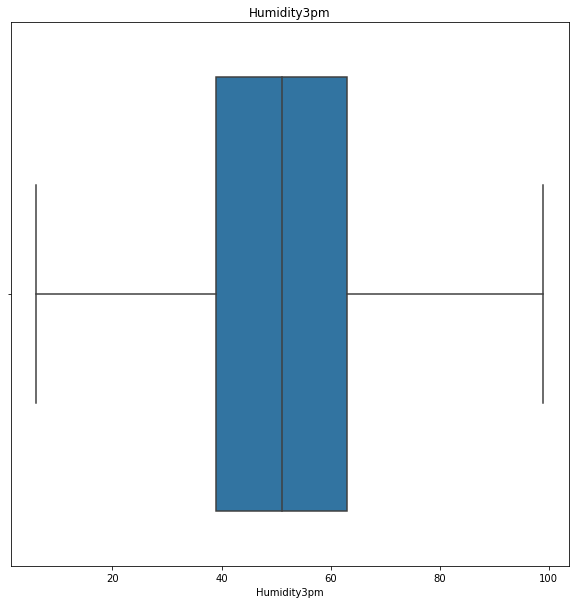

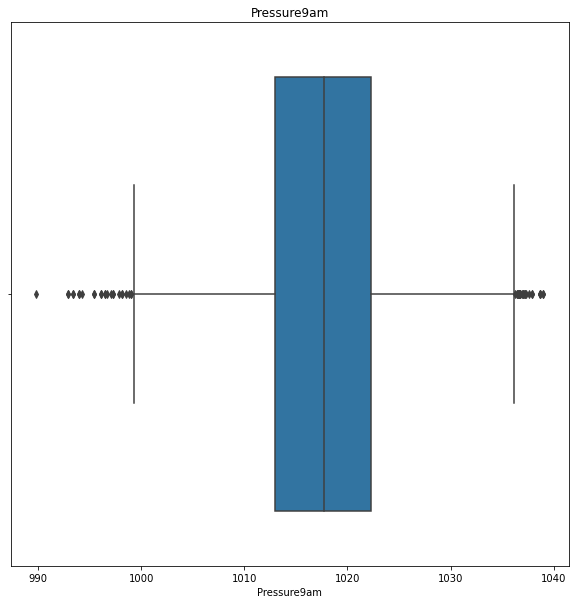

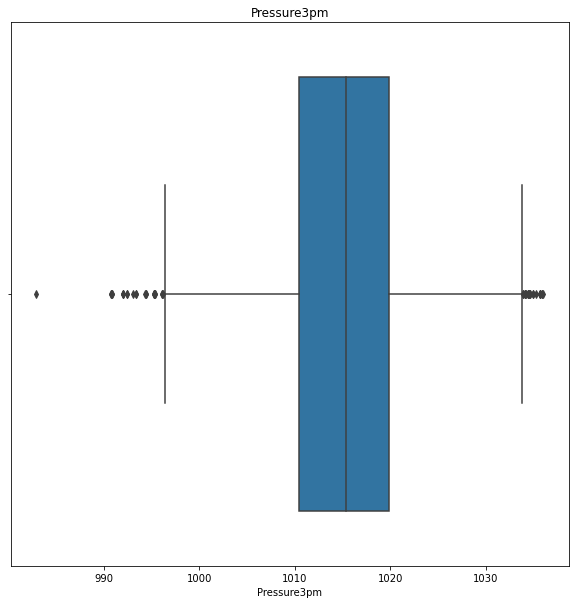

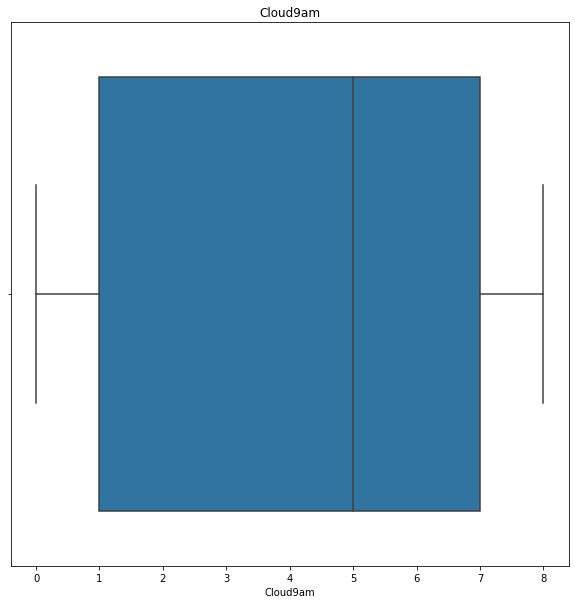

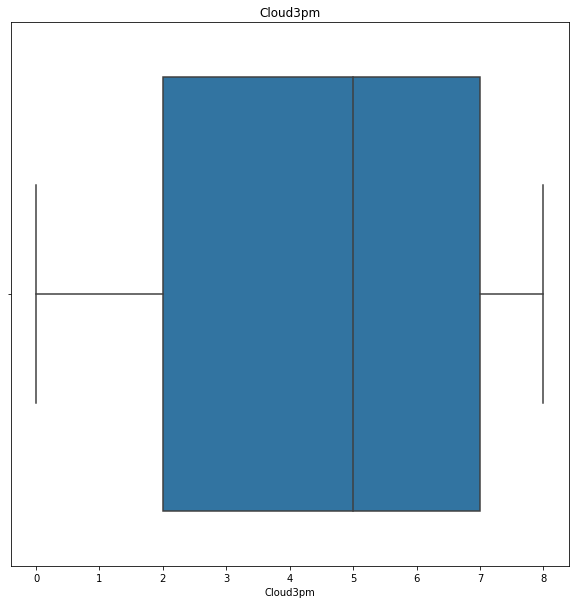

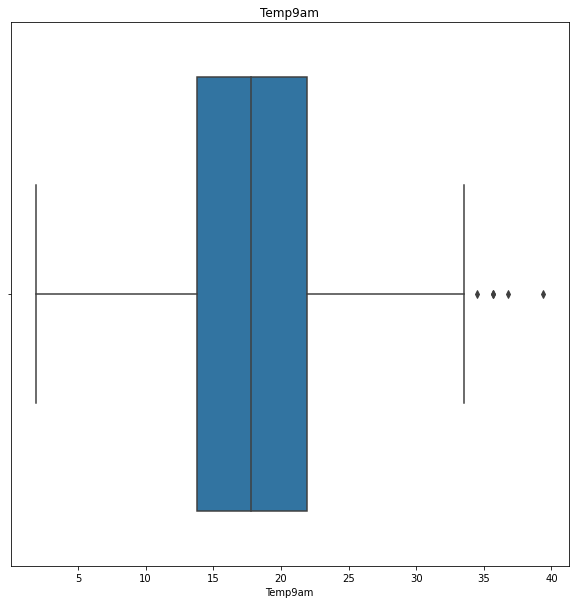

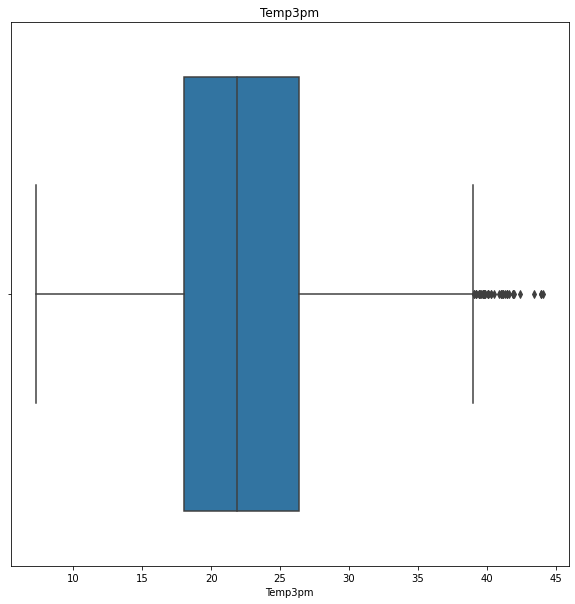

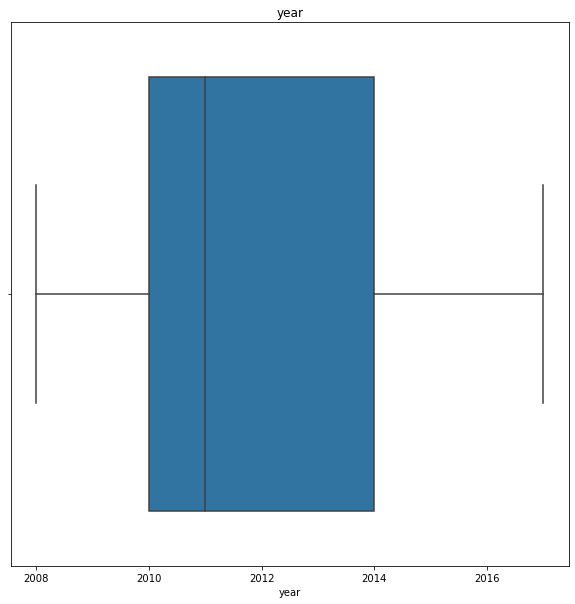

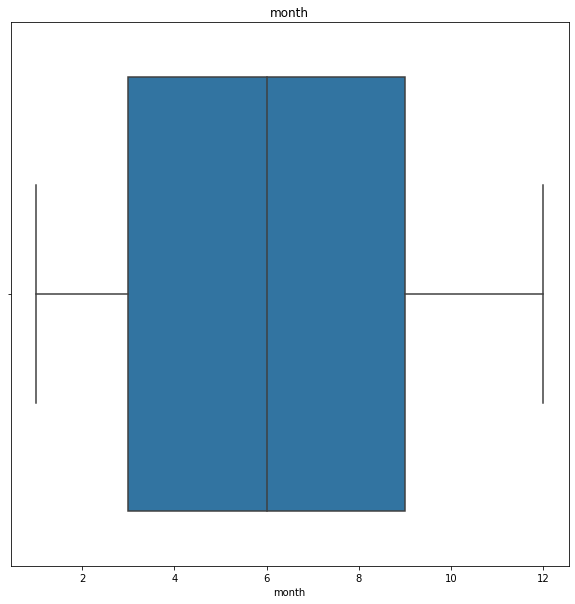

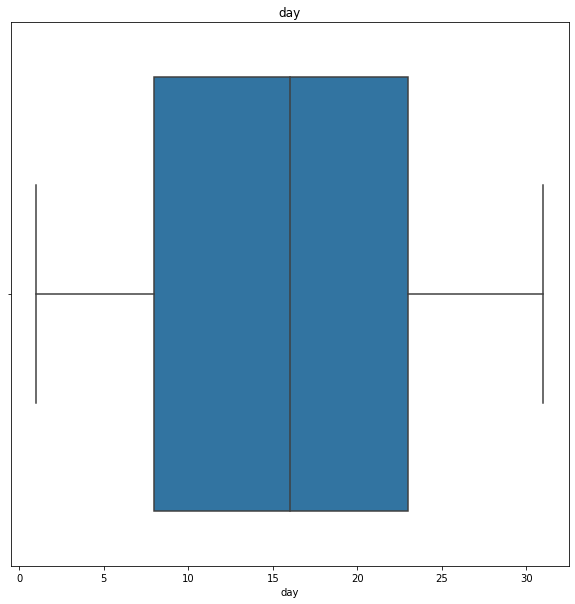

In [25]:
#checking for outliers using Box Plot:

for feature in numerical_features:
    plt.figure(figsize=(10,10))
    sns.boxplot(rain[feature])
    plt.title(feature)
    

In [26]:
# checking for outliers using the statistical formulas:

rain[numerical_features].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,year,month,day
count,8350.000000,8365.000000,8185.000000,4913.000000,4431.000000,7434.000000,8349.000000,8318.000000,8366.000000,8323.000000,7116.000000,7113.000000,6004.000000,5970.000000,8369.000000,8329.000000,8425.000000,8425.000000,8425.000000
mean,13.193305,23.859976,2.805913,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934,2012.102433,6.442136,15.741958
std,5.403596,6.136408,10.459379,5.044484,3.896235,14.665721,10.174579,9.766986,16.833283,18.423774,6.828699,6.766681,2.877658,2.731659,5.627035,5.980020,2.473137,3.437994,8.787354
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000,2008.000000,1.000000,1.000000
25%,9.200000,19.300000,0.000000,2.600000,4.750000,30.000000,6.000000,11.000000,56.000000,39.000000,1013.000000,1010.400000,1.000000,2.000000,13.800000,18.000000,2010.000000,3.000000,8.000000
50%,13.300000,23.300000,0.000000,4.600000,8.700000,39.000000,13.000000,19.000000,68.000000,51.000000,1017.700000,1015.300000,5.000000,5.000000,17.800000,21.900000,2011.000000,6.000000,16.000000
75%,17.400000,28.000000,1.000000,7.000000,10.700000,50.000000,20.000000,24.000000,80.000000,63.000000,1022.300000,1019.800000,7.000000,7.000000,21.900000,26.400000,2014.000000,9.000000,23.000000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000,2017.000000,12.000000,31.000000


Outlier Treatment to remove outliers from Numerical Features:

In [27]:
# features which has outliers:

features_with_outliers = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'WindGustSpeed','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']

In [28]:
# Replacing outliers using IQR:

for feature in features_with_outliers:
    q1 = rain[feature].quantile(0.25)
    q3 = rain[feature].quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    rain.loc[rain[feature]<lower_limit,feature] = lower_limit
    rain.loc[rain[feature]>upper_limit,feature] = upper_limit

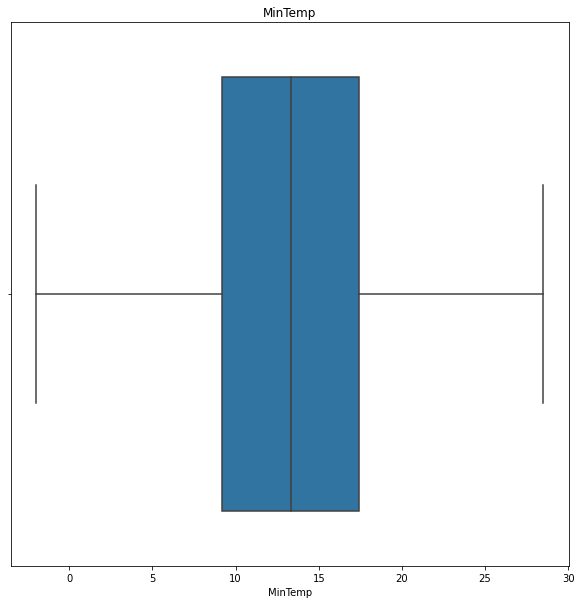

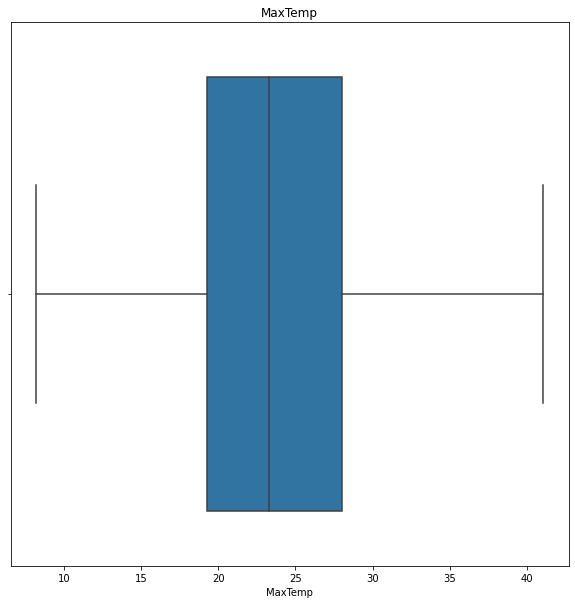

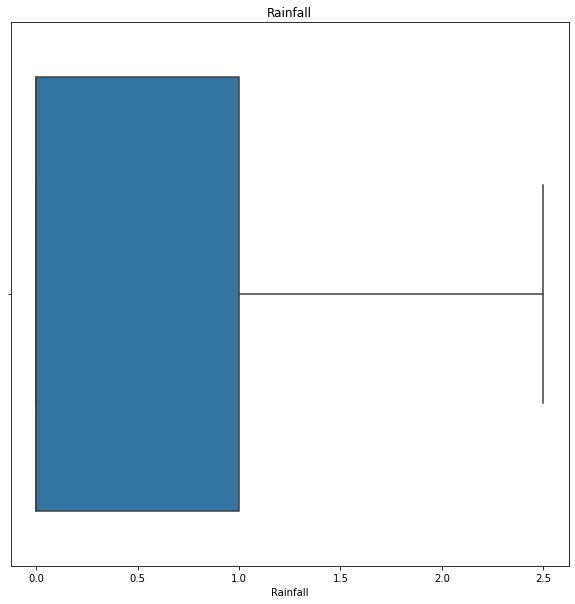

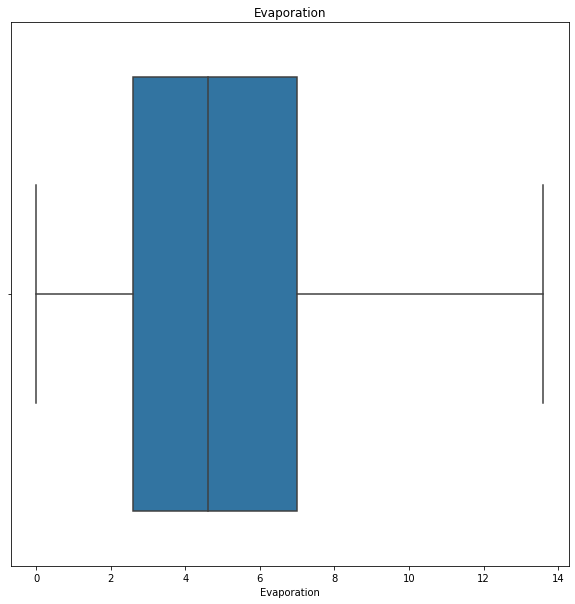

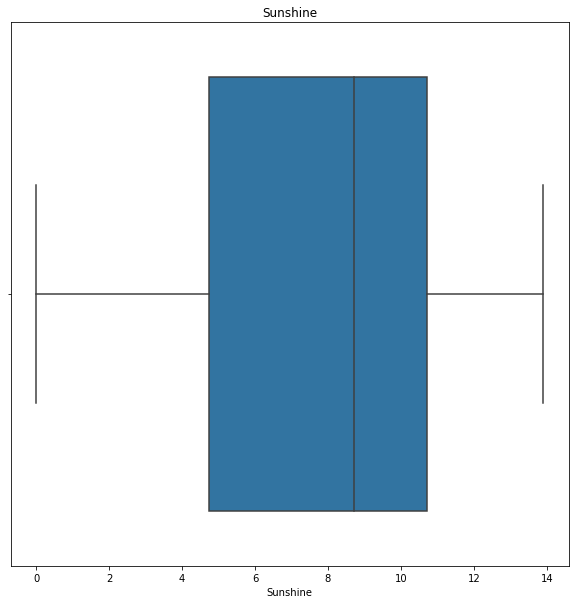

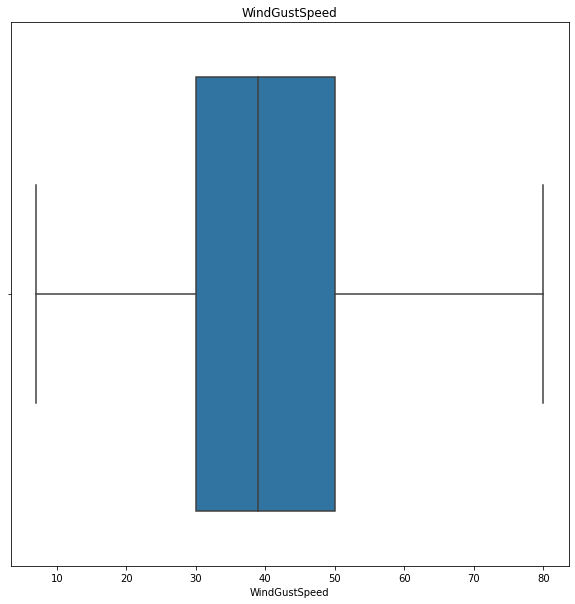

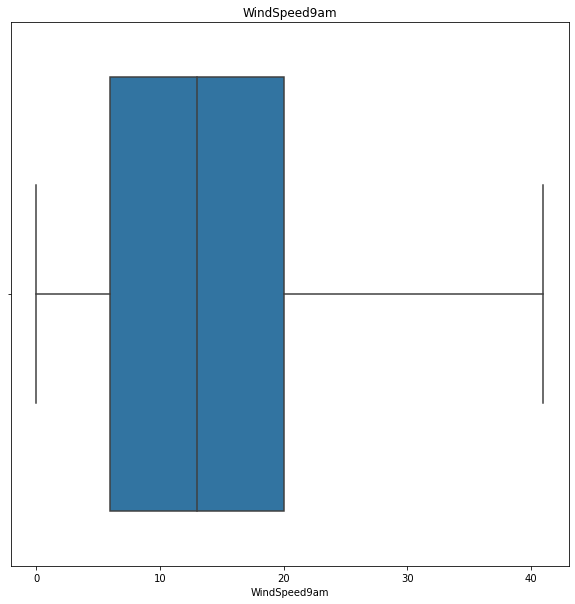

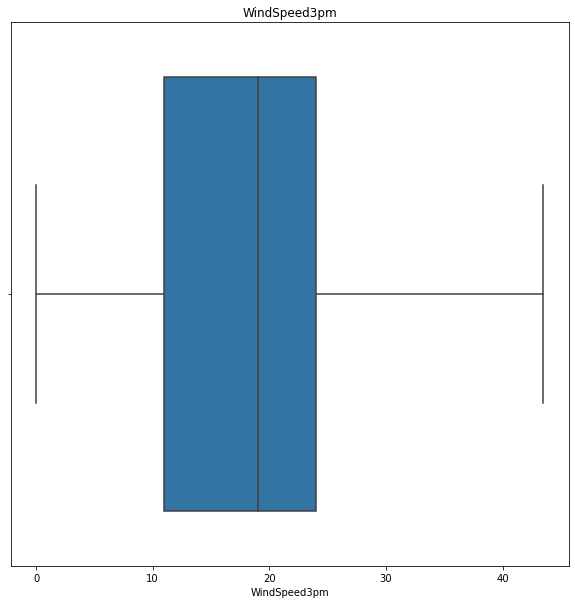

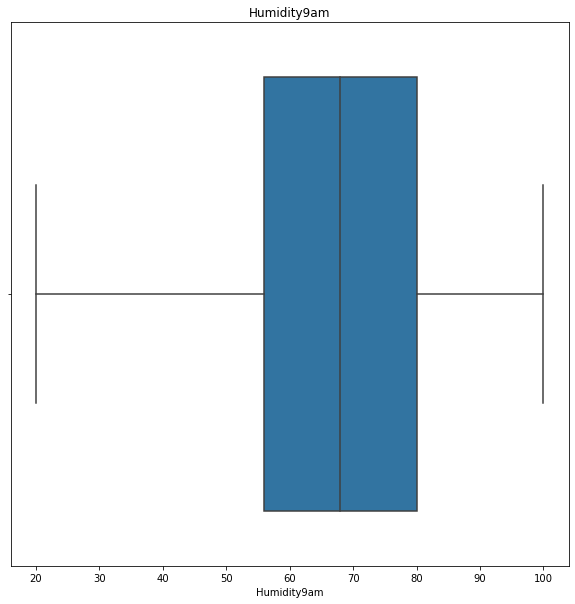

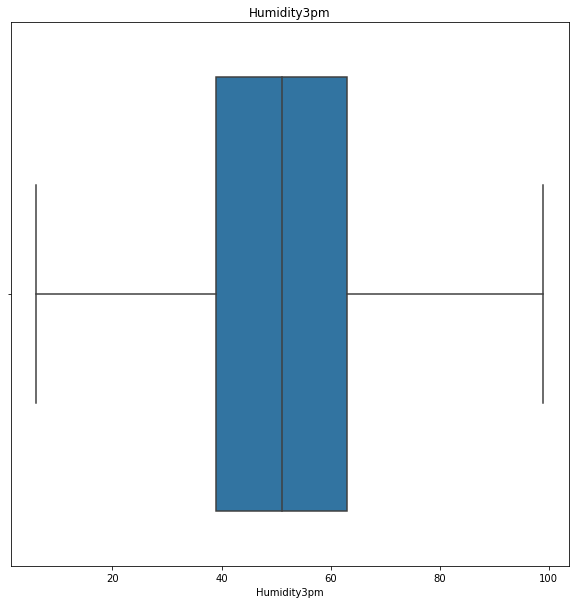

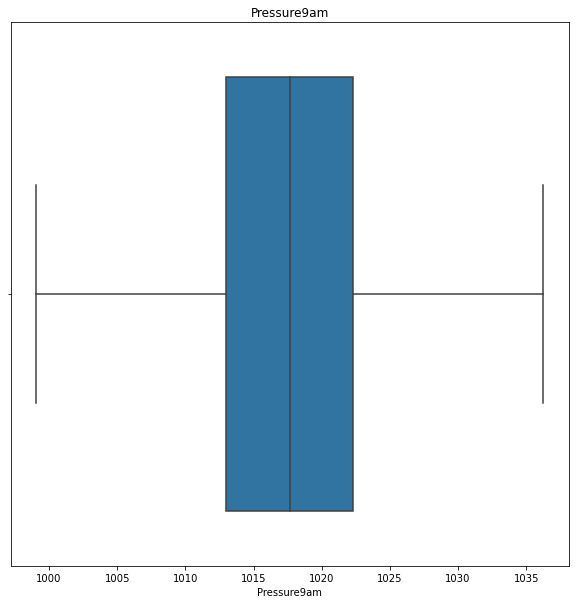

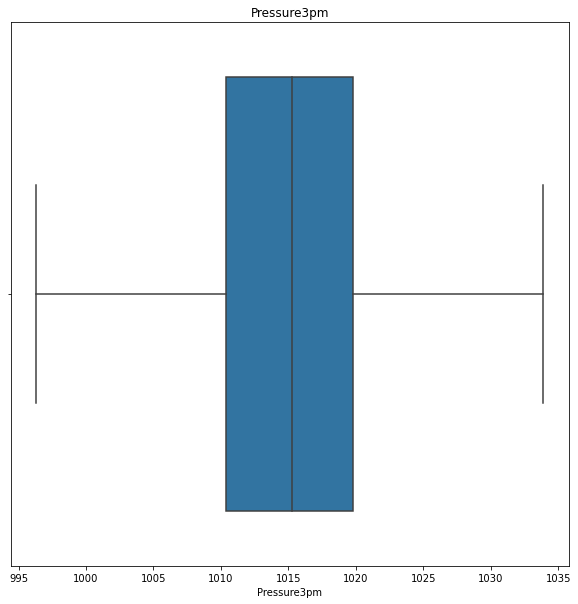

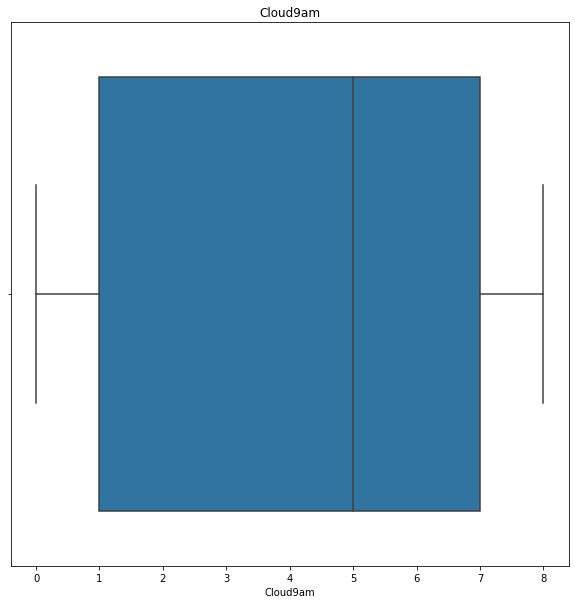

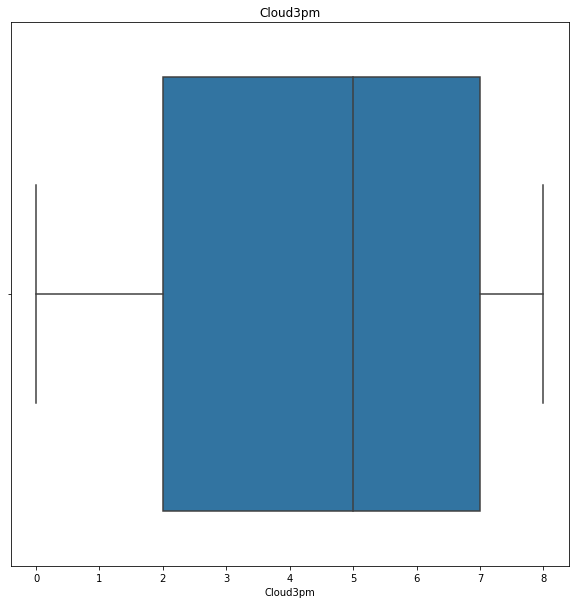

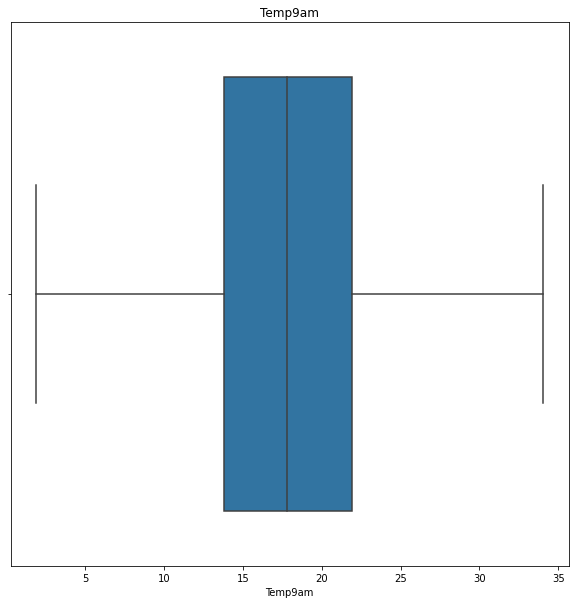

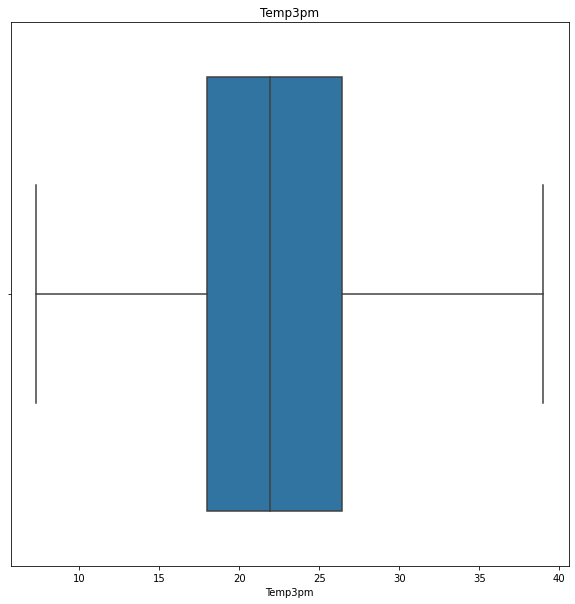

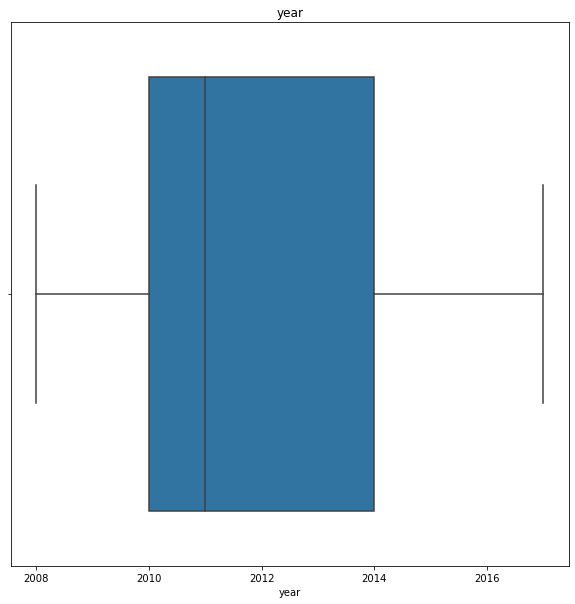

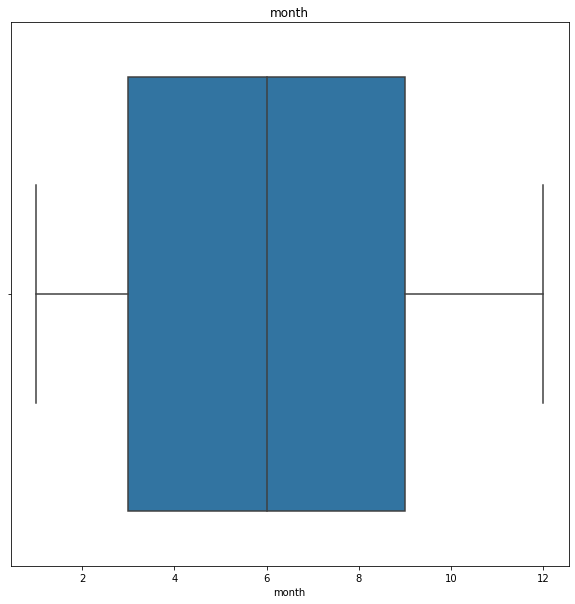

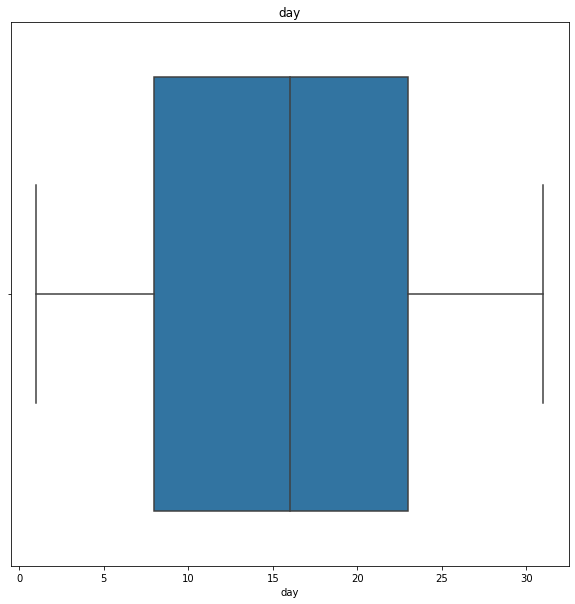

In [29]:
for feature in numerical_features:
    plt.figure(figsize=(10,10))
    sns.boxplot(rain[feature])
    plt.title(feature)

Imputing null values in numerical features using mean:

In [30]:
# list of numerical Features with Null values:

numerical_features_with_null = [feature for feature in numerical_features if rain[feature].isnull().sum()]
numerical_features_with_null

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [31]:
# Filling null values uisng mean: 

for feature in numerical_features_with_null:
    mean_value = rain[feature].mean()
    rain[feature].fillna(mean_value,inplace=True)

In [32]:
rain.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
year             0
month            0
day              0
dtype: int64

In [33]:
rain.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,Albury,13.4,22.9,0.6,5.119906,7.632205,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,5.119906,7.632205,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,5.119906,7.632205,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,5.119906,7.632205,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,5.119906,7.632205,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,No,2008,12,5


### Univariate Analysis

<AxesSubplot:>

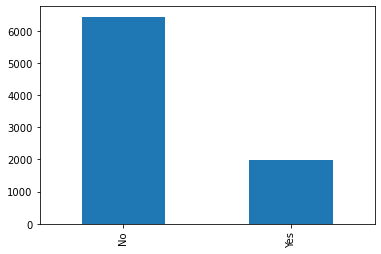

In [34]:
# Exploring RainTomorrow label

rain['RainTomorrow'].value_counts().plot(kind='bar')

Looks like Target variable is imbalanced. It has more 'No' values. If data is imbalanced, then it might decrease performance of model. As this data is released by the meteorological department of Australia, it doesn't make any sense when we try to balance target variable, because the truthfullness of data might descreases. So, let me keep it as it is.

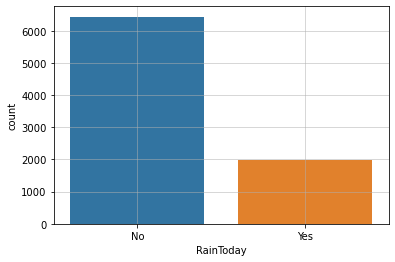

In [35]:
#Exploring RainToday Variable:

sns.countplot(data=rain, x="RainToday")
plt.grid(linewidth = 0.5)
plt.show()

###  Multivariate Analysis

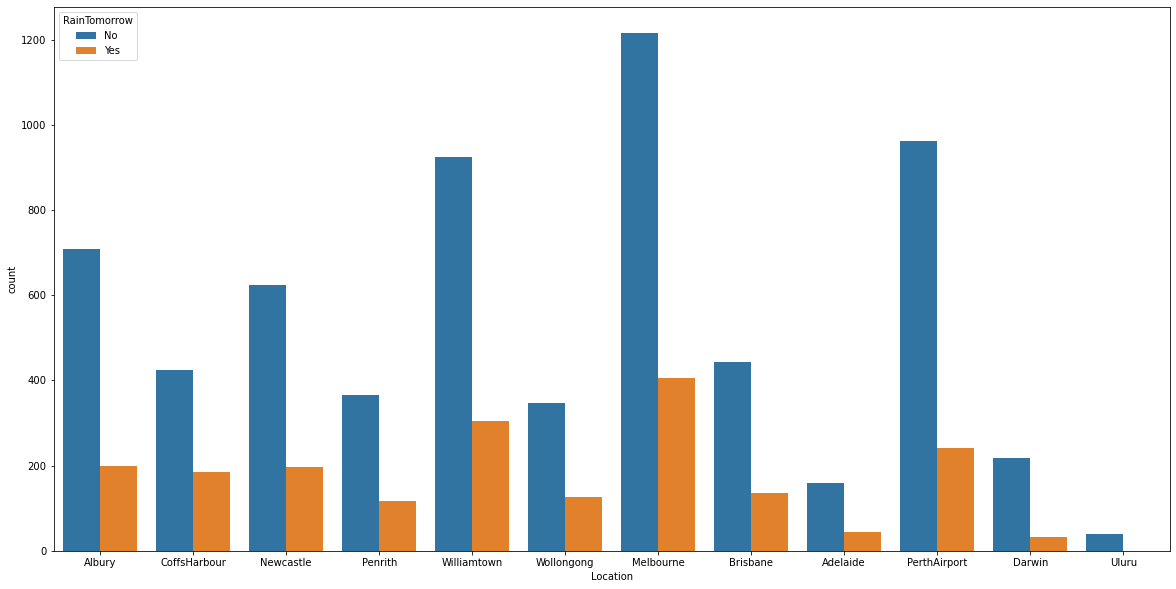

In [36]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x="Location", hue="RainTomorrow", data=rain)

<AxesSubplot:xlabel='Sunshine', ylabel='Rainfall'>

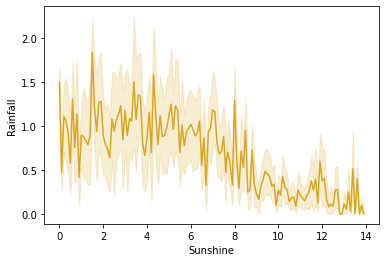

In [37]:
sns.lineplot(data=rain,x='Sunshine',y='Rainfall',color='goldenrod')

array([[<AxesSubplot:title={'center':'MinTemp'}>,
        <AxesSubplot:title={'center':'MaxTemp'}>,
        <AxesSubplot:title={'center':'Rainfall'}>,
        <AxesSubplot:title={'center':'Evaporation'}>],
       [<AxesSubplot:title={'center':'Sunshine'}>,
        <AxesSubplot:title={'center':'WindGustSpeed'}>,
        <AxesSubplot:title={'center':'WindSpeed9am'}>,
        <AxesSubplot:title={'center':'WindSpeed3pm'}>],
       [<AxesSubplot:title={'center':'Humidity9am'}>,
        <AxesSubplot:title={'center':'Humidity3pm'}>,
        <AxesSubplot:title={'center':'Pressure9am'}>,
        <AxesSubplot:title={'center':'Pressure3pm'}>],
       [<AxesSubplot:title={'center':'Cloud9am'}>,
        <AxesSubplot:title={'center':'Cloud3pm'}>,
        <AxesSubplot:title={'center':'Temp9am'}>,
        <AxesSubplot:title={'center':'Temp3pm'}>]], dtype=object)

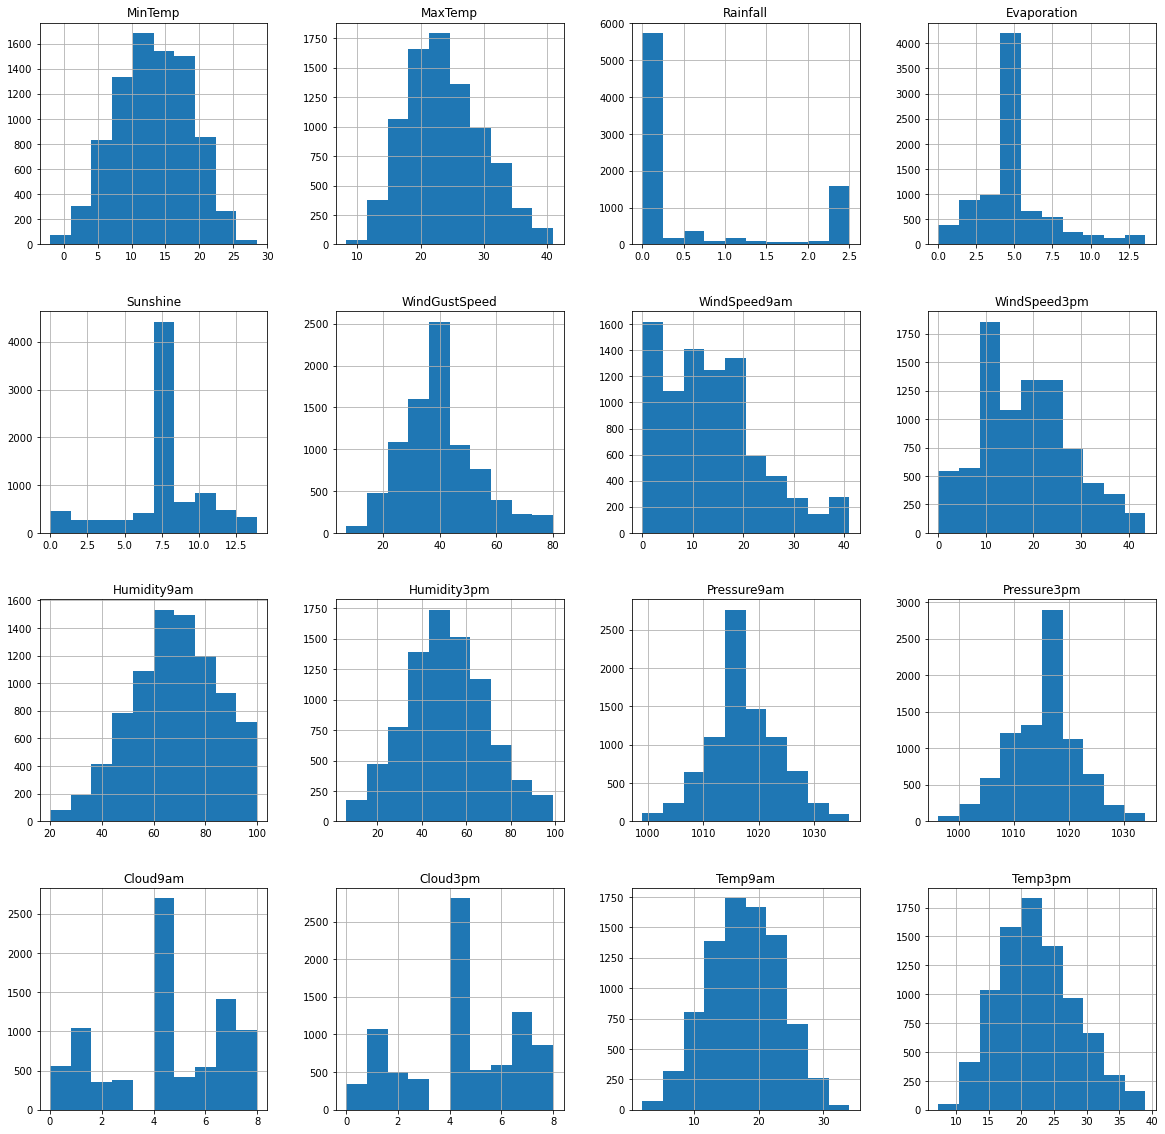

In [38]:
num_features = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
rain[num_features].hist(bins=10,figsize=(20,20))

Correlation: Correlation is a statistic that helps to measure the strength of relationship between features. 


In [39]:
rain.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,year,month,day
MinTemp,1.000000,0.718001,0.075556,0.378765,0.056184,0.232307,0.139208,0.182028,-0.130330,0.079048,-0.431617,-0.425306,0.091604,0.038414,0.887190,0.686292,0.044123,-0.245854,0.009446
MaxTemp,0.718001,1.000000,-0.235267,0.471384,0.379266,0.140585,0.011687,0.090981,-0.390515,-0.421429,-0.328197,-0.406001,-0.254414,-0.250543,0.866698,0.974538,0.119702,-0.162506,0.015722
Rainfall,0.075556,-0.235267,1.000000,-0.164845,-0.255176,0.087183,0.045306,0.027078,0.404765,0.384859,-0.117617,-0.040890,0.307582,0.263521,-0.099851,-0.245436,0.003306,0.001672,-0.017648
Evaporation,0.378765,0.471384,-0.164845,1.000000,0.346654,0.208527,0.166081,0.132428,-0.332103,-0.240127,-0.260124,-0.272803,-0.117655,-0.147804,0.450422,0.458000,0.141970,-0.037221,0.015207
Sunshine,0.056184,0.379266,-0.255176,0.346654,1.000000,-0.012151,-0.017446,0.031878,-0.360958,-0.440268,0.020120,-0.037756,-0.533391,-0.547304,0.250559,0.396694,0.065374,-0.006694,0.004662
WindGustSpeed,0.232307,0.140585,0.087183,0.208527,-0.012151,1.000000,0.601377,0.640967,-0.271939,-0.092607,-0.404907,-0.369817,0.022342,0.078299,0.204029,0.103139,-0.041851,0.050826,-0.002990
WindSpeed9am,0.139208,0.011687,0.045306,0.166081,-0.017446,0.601377,1.000000,0.564137,-0.359724,-0.108080,-0.174375,-0.135352,0.000076,0.056551,0.110262,-0.004690,-0.089078,0.038560,-0.004590
WindSpeed3pm,0.182028,0.090981,0.027078,0.132428,0.031878,0.640967,0.564137,1.000000,-0.252167,-0.089889,-0.250575,-0.205115,0.006831,0.004431,0.187655,0.068461,-0.055169,0.047180,-0.008772
Humidity9am,-0.130330,-0.390515,0.404765,-0.332103,-0.360958,-0.271939,-0.359724,-0.252167,1.000000,0.633368,0.143685,0.175286,0.405018,0.297133,-0.377312,-0.382141,0.100039,-0.115279,0.003970
Humidity3pm,0.079048,-0.421429,0.384859,-0.240127,-0.440268,-0.092607,-0.108080,-0.089889,0.633368,1.000000,0.002390,0.071555,0.424348,0.439965,-0.130367,-0.490686,-0.028920,-0.074256,0.012512


<AxesSubplot:>

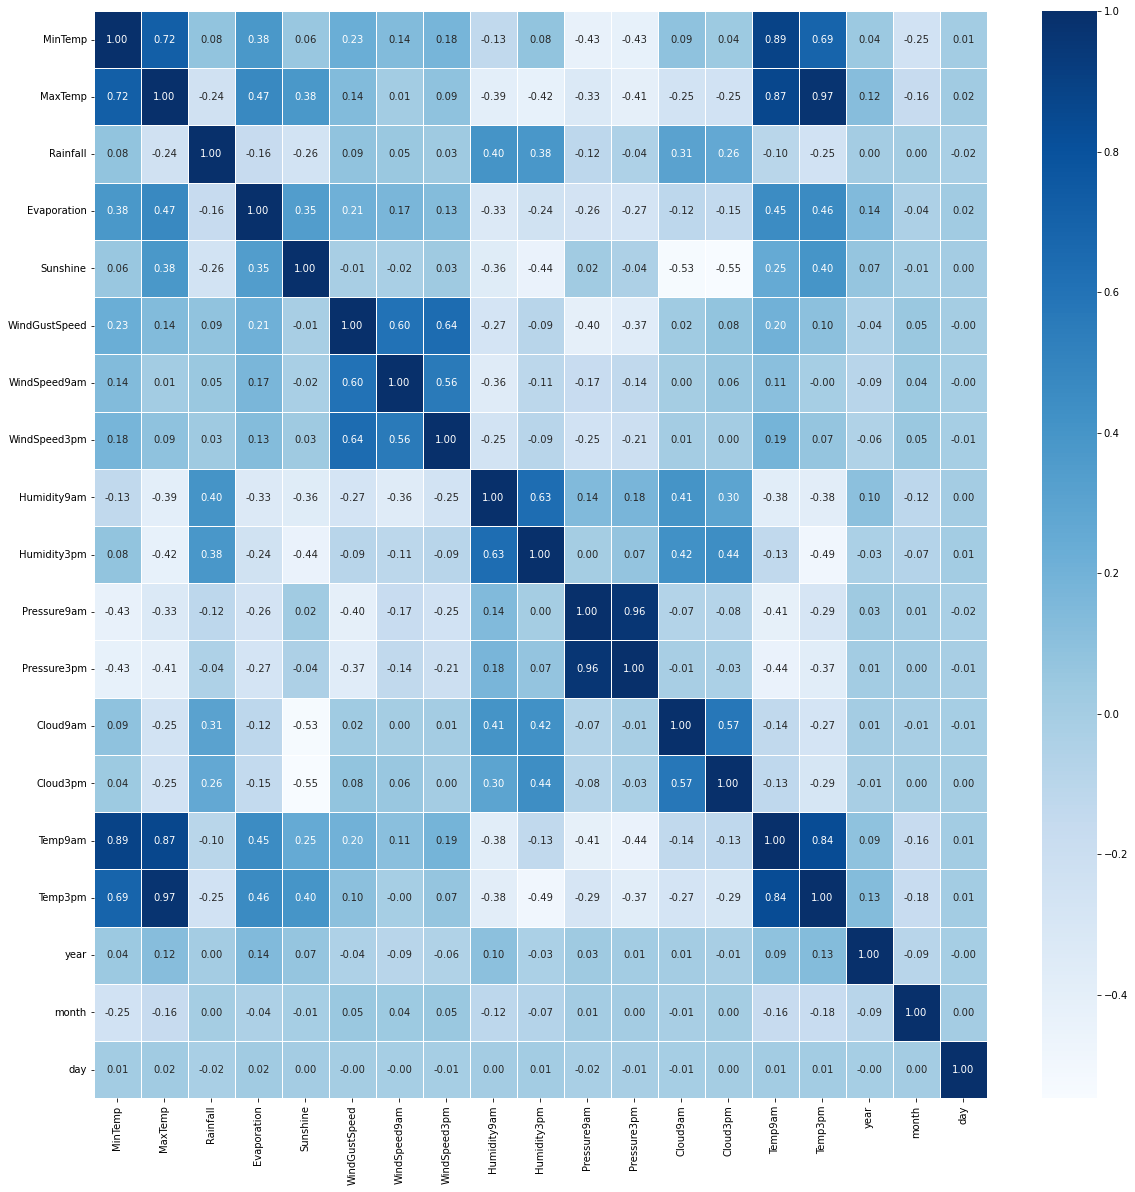

In [40]:
plt.figure(figsize=(20,20))
sns.heatmap(rain.corr(),linewidths=0.5,annot=True,fmt=".2f", cmap = 'Blues')

In [41]:
rain.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,Albury,13.4,22.9,0.6,5.119906,7.632205,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,5.119906,7.632205,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,5.119906,7.632205,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,5.119906,7.632205,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,5.119906,7.632205,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,No,2008,12,5


Most Machine Learning Algorithms like Logistic Regression, Support Vector Machines, K Nearest Neighbours etc. can't handle categorical data. Hence, these categorical data needs to converted to numerical data for modelling, which is called as Feature Encoding .

In [42]:
categorical_features

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [43]:
# Encoding Categorical Features using replace function:

rain['RainToday'].replace({'No':0, 'Yes': 1}, inplace = True)

# pd.get_dummies(rain['RainToday'],drop_first = True)

rain['RainTomorrow'].replace({'No':0, 'Yes': 1}, inplace = True)

In [44]:
def encode_data(feature_name):
    
    ''' 
    
     function which takes feature name as a parameter and return mapping dictionary to replace(or map) categorical data 
     to numerical data.
     
    '''
    
    mapping_dict = {}
    unique_values = list(rain[feature_name].unique())
    for idx in range(len(unique_values)):
        mapping_dict[unique_values[idx]] = idx
    print(mapping_dict)
    return mapping_dict


In [45]:
rain['WindGustDir'].replace(encode_data('WindGustDir'),inplace = True)

{'W': 0, 'WNW': 1, 'WSW': 2, 'NE': 3, 'NNW': 4, 'N': 5, 'NNE': 6, 'SW': 7, 'ENE': 8, 'SSE': 9, 'S': 10, 'NW': 11, 'SE': 12, 'ESE': 13, 'E': 14, 'SSW': 15}


In [46]:
rain['WindDir9am'].replace(encode_data('WindDir9am'),inplace = True)

{'W': 0, 'NNW': 1, 'SE': 2, 'ENE': 3, 'SW': 4, 'SSE': 5, 'S': 6, 'NE': 7, 'N': 8, 'SSW': 9, 'WSW': 10, 'ESE': 11, 'E': 12, 'NW': 13, 'WNW': 14, 'NNE': 15}


In [47]:
rain['WindDir3pm'].replace(encode_data('WindDir3pm'),inplace = True)

{'WNW': 0, 'WSW': 1, 'E': 2, 'NW': 3, 'W': 4, 'SSE': 5, 'ESE': 6, 'ENE': 7, 'NNW': 8, 'SSW': 9, 'SW': 10, 'SE': 11, 'N': 12, 'S': 13, 'NNE': 14, 'NE': 15}


In [48]:
rain['Location'].replace(encode_data('Location'), inplace = True)

{'Albury': 0, 'CoffsHarbour': 1, 'Newcastle': 2, 'Penrith': 3, 'Williamtown': 4, 'Wollongong': 5, 'Melbourne': 6, 'Brisbane': 7, 'Adelaide': 8, 'PerthAirport': 9, 'Darwin': 10, 'Uluru': 11}


In [49]:
rain.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,0,13.4,22.9,0.6,5.119906,7.632205,0,44.0,0,0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,0,0,2008,12,1
1,0,7.4,25.1,0.0,5.119906,7.632205,1,44.0,1,1,4.0,22.0,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,0,0,2008,12,2
2,0,12.9,25.7,0.0,5.119906,7.632205,2,46.0,0,1,19.0,26.0,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,0,0,2008,12,3
3,0,9.2,28.0,0.0,5.119906,7.632205,3,24.0,2,2,11.0,9.0,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,0,0,2008,12,4
4,0,17.5,32.3,1.0,5.119906,7.632205,0,41.0,3,3,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0,2008,12,5


Spliting data into input features and label

In [50]:
X = rain.drop(['RainTomorrow'],axis=1)
y = rain['RainTomorrow']

In [51]:
# finding feature importance using ExtraTreesRegressor:

from sklearn.ensemble import ExtraTreesRegressor
etr_model = ExtraTreesRegressor()
etr_model.fit(X,y)

ExtraTreesRegressor()

In [52]:
etr_model.feature_importances_

array([0.02595646, 0.02798094, 0.02782708, 0.0413589 , 0.02362508,
       0.03907244, 0.02988794, 0.05987214, 0.03163503, 0.03450023,
       0.03235994, 0.03600086, 0.03961347, 0.20047467, 0.0295102 ,
       0.0347596 , 0.0274227 , 0.05939673, 0.02620618, 0.02862886,
       0.05085635, 0.0299403 , 0.02906363, 0.03405028])

<AxesSubplot:>

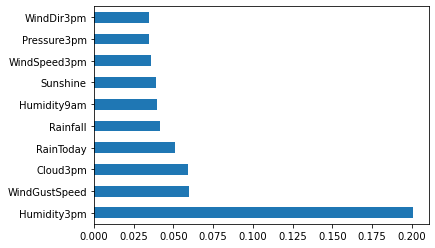

In [53]:
# visualizing feature importance using bar graph:

feature_imp = pd.Series(etr_model.feature_importances_,index=X.columns)
feature_imp.nlargest(10).plot(kind='barh')

In [54]:
feature_imp

Location         0.025956
MinTemp          0.027981
MaxTemp          0.027827
Rainfall         0.041359
Evaporation      0.023625
Sunshine         0.039072
WindGustDir      0.029888
WindGustSpeed    0.059872
WindDir9am       0.031635
WindDir3pm       0.034500
WindSpeed9am     0.032360
WindSpeed3pm     0.036001
Humidity9am      0.039613
Humidity3pm      0.200475
Pressure9am      0.029510
Pressure3pm      0.034760
Cloud9am         0.027423
Cloud3pm         0.059397
Temp9am          0.026206
Temp3pm          0.028629
RainToday        0.050856
year             0.029940
month            0.029064
day              0.034050
dtype: float64

## 5) Split Data into Training and Testing Set

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [56]:
print("Length of Training Data: {}".format(len(X_train)))
print("Length of Testing Data: {}".format(len(X_test)))

Length of Training Data: 6740
Length of Testing Data: 1685


## 6) Feature Scaling

In [57]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [58]:
X_test = scaler.transform(X_test)

Save the Scaler object to Standardize Real Time Data feeded by users for prediction

In [59]:
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

## Model Building


In [60]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

(i) Logistic Regression

### Model Training:

In [61]:
from sklearn.linear_model import LogisticRegression

In [62]:
start_time = time.time()
classifier_logreg = LogisticRegression(solver='liblinear', random_state=0)
classifier_logreg.fit(X_train, y_train)
end_time = time.time()

In [63]:
print("Time Taken to train: {}".format(end_time - start_time))

Time Taken to train: 0.2971644401550293


### Model Testing:

In [64]:
y_pred = classifier_logreg.predict(X_test)

In [65]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [66]:
print("Accuracy Score: {}".format(accuracy_score(y_test,y_pred)))

Accuracy Score: 0.8367952522255193


`Checking for Overfitting and Under Fitting:`

In [67]:
print("Train Data Score: {}".format(classifier_logreg.score(X_train, y_train)))
print("Test Data Score: {}".format(classifier_logreg.score(X_test, y_test)))

Train Data Score: 0.8302670623145401
Test Data Score: 0.8367952522255193


#### Accuracy Score of Training and Testing Data is comparable and almost equal. So, there is no question of Underfitting and Over Fitting. And model is generalizing well for new unseen data.

In [68]:
# confusion Matrix:

print("Confusion Matrix:")
print("\n",confusion_matrix(y_test,y_pred))

Confusion Matrix:

 [[1203   83]
 [ 192  207]]


In [69]:
# Classification Report:

print("classification_report:")
print("\n",classification_report(y_test,y_pred))

classification_report:

               precision    recall  f1-score   support

           0       0.86      0.94      0.90      1286
           1       0.71      0.52      0.60       399

    accuracy                           0.84      1685
   macro avg       0.79      0.73      0.75      1685
weighted avg       0.83      0.84      0.83      1685



In [70]:
# predicting probabilities:

y_pred_logreg_proba = classifier_logreg.predict_proba(X_test)

In [71]:
# Finding True Positive Rate(tpr), False Positive Rate(fpr), threshold values to plot ROC curve

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_logreg_proba[:,1])

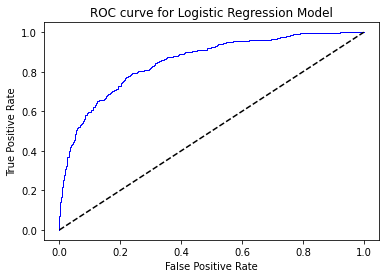

In [72]:
# Plotting ROC curve:

plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,'-b',linewidth=1)
plt.plot([0,1], [0,1], 'k--' )
plt.title('ROC curve for Logistic Regression Model')
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.show()

In [73]:
# finding ROC-AUC score:

from sklearn.metrics import roc_auc_score
print('ROC AUC Scores: {}'.format(roc_auc_score(y_test, y_pred)))

ROC AUC Scores: 0.7271278897087198


#### Finding whether model performance can be improved using Cross Validation Score:

In [74]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier_logreg, X_train, y_train, cv = 5, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.82937685 0.83456973 0.83308605 0.83679525 0.81973294]


In [75]:
print('Average cross-validation score: {}'.format(scores.mean()))

Average cross-validation score: 0.8307121661721067


The mean accuracy score of cross validation is almost same like original model accuracy score which is 0.8445. So, accuracy of model may not be improved using Cross-validation.

 Cat Boost

In [76]:
from catboost import CatBoostClassifier

Model Training:

In [77]:
start_time = time.time()
cat_classifier = CatBoostClassifier(iterations=100, eval_metric = "AUC")
cat_classifier.fit(X_train, y_train)
end_time = time.time()

Learning rate set to 0.192208
0:	total: 190ms	remaining: 18.8s
1:	total: 221ms	remaining: 10.8s
2:	total: 255ms	remaining: 8.25s
3:	total: 288ms	remaining: 6.91s
4:	total: 317ms	remaining: 6.03s
5:	total: 347ms	remaining: 5.43s
6:	total: 376ms	remaining: 4.99s
7:	total: 411ms	remaining: 4.73s
8:	total: 444ms	remaining: 4.49s
9:	total: 479ms	remaining: 4.31s
10:	total: 510ms	remaining: 4.12s
11:	total: 539ms	remaining: 3.95s
12:	total: 568ms	remaining: 3.8s
13:	total: 596ms	remaining: 3.66s
14:	total: 627ms	remaining: 3.55s
15:	total: 660ms	remaining: 3.46s
16:	total: 693ms	remaining: 3.38s
17:	total: 726ms	remaining: 3.31s
18:	total: 757ms	remaining: 3.23s
19:	total: 788ms	remaining: 3.15s
20:	total: 823ms	remaining: 3.1s
21:	total: 855ms	remaining: 3.03s
22:	total: 887ms	remaining: 2.97s
23:	total: 921ms	remaining: 2.92s
24:	total: 957ms	remaining: 2.87s
25:	total: 992ms	remaining: 2.82s
26:	total: 1.02s	remaining: 2.77s
27:	total: 1.06s	remaining: 2.73s
28:	total: 1.1s	remaining: 2.6

In [78]:
print("Time Taken to train: {}".format(end_time - start_time))

Time Taken to train: 3.69635009765625


Model Testing:

In [79]:
y_pred_cat = cat_classifier.predict(X_test)

In [80]:
print("Accuracy Score: {}".format(accuracy_score(y_test,y_pred_cat)))

Accuracy Score: 0.8836795252225519


Checking for Overfitting and Under Fitting:

In [81]:
print("Train Data Score: {}".format(cat_classifier.score(X_train, y_train)))
print("Test Data Score: {}".format(cat_classifier.score(X_test, y_test)))

Train Data Score: 0.9372403560830861
Test Data Score: 0.8836795252225519


Accuracy Score of Training and Testing Data is comparable and almost equal. So, there is no question of Underfitting and Over Fitting. And model is generalizing well for new unseen data.

In [82]:
# Confusion Matrix:

print("Confusion Matrix:")
print("\n",confusion_matrix(y_test,y_pred_cat))

Confusion Matrix:

 [[1232   54]
 [ 142  257]]


In [83]:
# classification Report:

print("classification_report:")
print("\n",classification_report(y_test,y_pred_cat))

classification_report:

               precision    recall  f1-score   support

           0       0.90      0.96      0.93      1286
           1       0.83      0.64      0.72       399

    accuracy                           0.88      1685
   macro avg       0.86      0.80      0.83      1685
weighted avg       0.88      0.88      0.88      1685



In [84]:
# predicting the probabilities:

y_pred_cat_proba = cat_classifier.predict_proba(X_test)

In [85]:
# Finding True Positive Rate(tpr), False Positive Rate(fpr), threshold values to plot ROC curve  

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_cat_proba[:,1])

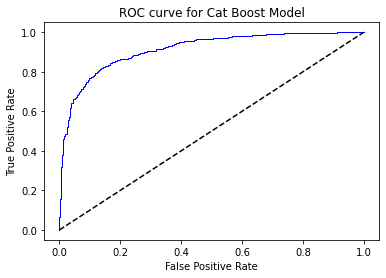

In [86]:
# plotting ROC Curve:

plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,'-b',linewidth=1)
plt.plot([0,1], [0,1], 'k--' )
plt.title('ROC curve for Cat Boost Model')
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.show()

In [87]:
#finding ROC AUC Scores:

from sklearn.metrics import roc_auc_score
print('ROC AUC Scores: {}'.format(roc_auc_score(y_test, y_pred_cat)))

ROC AUC Scores: 0.8010598034744716


#### Finding whether model performance can be improved using Cross Validation Score:

In [88]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(cat_classifier, X_train, y_train, cv = 5, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))

Learning rate set to 0.17474
0:	total: 26.3ms	remaining: 2.6s
1:	total: 50.9ms	remaining: 2.5s
2:	total: 77.5ms	remaining: 2.51s
3:	total: 103ms	remaining: 2.48s
4:	total: 129ms	remaining: 2.45s
5:	total: 156ms	remaining: 2.44s
6:	total: 182ms	remaining: 2.41s
7:	total: 211ms	remaining: 2.43s
8:	total: 241ms	remaining: 2.44s
9:	total: 272ms	remaining: 2.45s
10:	total: 299ms	remaining: 2.42s
11:	total: 327ms	remaining: 2.4s
12:	total: 353ms	remaining: 2.36s
13:	total: 380ms	remaining: 2.34s
14:	total: 411ms	remaining: 2.33s
15:	total: 441ms	remaining: 2.32s
16:	total: 472ms	remaining: 2.31s
17:	total: 501ms	remaining: 2.28s
18:	total: 527ms	remaining: 2.25s
19:	total: 553ms	remaining: 2.21s
20:	total: 581ms	remaining: 2.18s
21:	total: 612ms	remaining: 2.17s
22:	total: 646ms	remaining: 2.16s
23:	total: 678ms	remaining: 2.15s
24:	total: 706ms	remaining: 2.12s
25:	total: 732ms	remaining: 2.08s
26:	total: 758ms	remaining: 2.05s
27:	total: 791ms	remaining: 2.03s
28:	total: 823ms	remaining: 2

42:	total: 1.24s	remaining: 1.65s
43:	total: 1.27s	remaining: 1.62s
44:	total: 1.3s	remaining: 1.59s
45:	total: 1.33s	remaining: 1.56s
46:	total: 1.36s	remaining: 1.53s
47:	total: 1.39s	remaining: 1.5s
48:	total: 1.41s	remaining: 1.47s
49:	total: 1.44s	remaining: 1.44s
50:	total: 1.47s	remaining: 1.41s
51:	total: 1.5s	remaining: 1.39s
52:	total: 1.53s	remaining: 1.36s
53:	total: 1.56s	remaining: 1.33s
54:	total: 1.59s	remaining: 1.3s
55:	total: 1.61s	remaining: 1.27s
56:	total: 1.64s	remaining: 1.24s
57:	total: 1.67s	remaining: 1.21s
58:	total: 1.7s	remaining: 1.18s
59:	total: 1.73s	remaining: 1.15s
60:	total: 1.75s	remaining: 1.12s
61:	total: 1.78s	remaining: 1.09s
62:	total: 1.81s	remaining: 1.06s
63:	total: 1.84s	remaining: 1.03s
64:	total: 1.87s	remaining: 1.01s
65:	total: 1.9s	remaining: 978ms
66:	total: 1.93s	remaining: 949ms
67:	total: 1.95s	remaining: 919ms
68:	total: 1.98s	remaining: 889ms
69:	total: 2s	remaining: 859ms
70:	total: 2.03s	remaining: 830ms
71:	total: 2.06s	remain

86:	total: 2.51s	remaining: 375ms
87:	total: 2.54s	remaining: 346ms
88:	total: 2.57s	remaining: 317ms
89:	total: 2.6s	remaining: 288ms
90:	total: 2.63s	remaining: 260ms
91:	total: 2.65s	remaining: 231ms
92:	total: 2.68s	remaining: 202ms
93:	total: 2.71s	remaining: 173ms
94:	total: 2.74s	remaining: 144ms
95:	total: 2.77s	remaining: 115ms
96:	total: 2.8s	remaining: 86.6ms
97:	total: 2.83s	remaining: 57.7ms
98:	total: 2.85s	remaining: 28.8ms
99:	total: 2.88s	remaining: 0us
Cross-validation scores:[0.87240356 0.86721068 0.86424332 0.86721068 0.85534125]


In [89]:
print('Average cross-validation score: {}'.format(scores.mean()))

Average cross-validation score: 0.8652818991097924


#### The mean accuracy score of cross validation is almost same like original model accuracy score which is 0.8579076625491403. So, accuracy of model may not be improved using Cross-validation.

#### Random Forest

In [90]:
from sklearn.ensemble import RandomForestClassifier

Model Training:

In [91]:
start_time = time.time()
classifier_rf=RandomForestClassifier()
classifier_rf.fit(X_train,y_train)
end_time = time.time()

In [92]:
print("Time Taken to train: {}".format(end_time - start_time))

Time Taken to train: 9.208181142807007


Model Testing:

In [93]:
y_pred_rf = classifier_rf.predict(X_test)

In [94]:
print("Accuracy Score: {}".format(accuracy_score(y_test,y_pred_rf)))

Accuracy Score: 0.8949554896142433


Checking for Overfitting and Under Fitting:

In [95]:
print("Train Data Score: {}".format(classifier_rf.score(X_train, y_train)))
print("Test Data Score: {}".format(classifier_rf.score(X_test, y_test)))

Train Data Score: 1.0
Test Data Score: 0.8949554896142433


Accuracy score for Training Set is almost 1 or 100%, which is quite uncommon. And testing accuracy is 0.85. It seems like model is overfitting, because the generalization for unseen data is not that accurate, when compared with seen data and difference between training - testing accuracy is not minimum.

##  Results and Conclusion:

Best Models in terms of accuracy (In my Experiment):

    1) Cat Boost Model
    2) Logistic Regression
    3) Random Forest
    
Best Models in terms of Computation Time (In my Experiment):

    1) Logistic Regression
    2) Random Forest
    3) Cat Boost Model
        

Conclusion:

The accuracy score of Cat Boost Model is high when compared with accuracy scores of Logistic Regression and Random Forest. But cat Boost model consumes lot of time to train the model.

In terms of computation time and Accuracy score, logistic Regression model is doing job.


## Saving Classifier Object into Pickle File:

In [96]:
with open('logreg.pkl', 'wb') as file:
    pickle.dump(classifier_logreg, file)

In [97]:
with open('catboostclassifier.pkl', 'wb') as file:
    pickle.dump(cat_classifier, file)